# Surprise Housing Case Study

---

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.

<br>

<b>Business Goal</b>


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

---

---

## Reading and Understanding the Data

In [1]:
#numpy, pandas
import numpy as np, pandas as pd

#plotting libraries
import matplotlib.pyplot as plt, seaborn as sns   
%matplotlib inline

#sklearn libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

#statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# pd display options
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100
pd.options.display.max_rows=100
#pd.options.display.max_columns=100

In [666]:
# read csv
df = pd.read_csv("train.csv")

In [667]:
# see first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [668]:
#check metadata
print(df.shape, len(df.index), len(df.columns), "\n","="*50)
print(df.info(verbose=True, show_counts=True), "\n","="*50)

(1460, 81) 1460 81 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

In [669]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [670]:
# Checking any duplicate values present in the dateframe
df.duplicated().value_counts()

False    1460
dtype: int64

In [671]:
#Checking columns, rows with all null values
df.isnull().all().sum(), df.isnull().all(axis=1).sum()

(0, 0)

In [672]:
#percentage of missing values across columns
        #print(df.columns[df.isna().any()])
        #print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False))
print(round(df[df.columns[df.isna().any()]].isnull().sum()/len(df.index)*100,2))  
print("="*50)
print(df[df.columns[df.isna().any()]].info())

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-nu

In [673]:
#checking values of columns with high null value proportion
print(df.PoolQC.value_counts(), "\n","="*50)
print(df.MiscFeature.value_counts(), "\n","="*50)
print(df.Alley.value_counts(), "\n","="*50)
print(df.Fence.value_counts())

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64 
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64 
Grvl    50
Pave    41
Name: Alley, dtype: int64 
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [674]:
#checking values of MiscVal since it seems related to MiscFeature
print(df.MiscVal.value_counts(), "\n","="*30)

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64 


In [675]:
#checkpoint1
#df1 = df.copy()
#df=df1.copy()
df.shape

(1460, 81)

## Data Treatment & Cleaning

### Dropping columns (with high null values or irrelevant)

In [676]:
#Dropping 
#    -ID
#    -columns with high null value proportion
#    -MiscVal as it is related to MiscFeature and has high proportion 
#       of zero values corresponding to nulls in MiscFeature  
#    -MoSold,LotFrontage - seems irrelevant
df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','MiscVal','MoSold','LotFrontage'], axis=1, inplace = True)
df.shape

(1460, 73)

### Null Value Imputations

In [677]:
# Imputing null values with mode for categorical columns with null values< 6%
for col in ('GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond',
            'BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1',
            'MasVnrType','Electrical'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [678]:
# Imputing with 'NA' for categorical columns with high null values
df.FireplaceQu = df.FireplaceQu.fillna('unkown')

In [679]:
# Imputing null values with mean for numerical columns
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [680]:
#check any columns with missing values
print(df.columns[df.isna().any()])

Index([], dtype='object')


In [681]:
#checkpoint2
#df2 = df.copy()
#df=df2.copy()
df.shape

(1460, 73)

### Fixing value formats

In [682]:
df.select_dtypes(include=['float64', 'int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [683]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [684]:
#Fix categorical data with numeric dtype
df.MSSubClass=df.MSSubClass.astype('object')

In [685]:
df.GarageYrBlt.value_counts().sample(10)

1978.0    19
1937.0     2
2004.0    53
1985.0    10
1916.0     5
1932.0     3
1965.0    21
1952.0     3
1925.0    10
1926.0     6
Name: GarageYrBlt, dtype: int64

In [686]:
#Fix categorical data with numeric dtype
df.GarageYrBlt=df.GarageYrBlt.astype('int64')

### Derived Variables (Dates)

In [687]:
# Handling dates by calculating age instead of years
df['HouseAge'] = 2022-df.YearBuilt
df['RemodAge'] = 2022-df.YearRemodAdd
df['SoldAge'] = 2022-df.YrSold
df['GarageAge'] = 2022-df.GarageYrBlt

In [688]:
df[['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt',
    'HouseAge','RemodAge','SoldAge','GarageAge']].head()

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt,HouseAge,RemodAge,SoldAge,GarageAge
0,2003,2003,2008,2003,19,19,14,19
1,1976,1976,2007,1976,46,46,15,46
2,2001,2002,2008,2001,21,20,14,21
3,1915,1970,2006,1998,107,52,16,24
4,2000,2000,2008,2000,22,22,14,22


In [689]:
# Dropping year columns as they're no longer required
df = df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1)

In [690]:
# Select all numeric variables
df_num = df.select_dtypes(include=['float64', 'int64'])
print(df_num.info())
print("="*50)
# Select all categorical variables
df_cat = df.select_dtypes(include=['object'])
print(df_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   OverallQual    1460 non-null   int64  
 2   OverallCond    1460 non-null   int64  
 3   MasVnrArea     1460 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  BsmtHalfBath   1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

In [691]:
#checkpoint3
#df3 = df.copy()
#df=df3.copy()
df.shape

(1460, 73)

### Outlier Treatment

In [692]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0


In [693]:
# Dropping the outliers using IQR method
def drop_outliers(x):
    
    for col in df_num:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [694]:
print(df.shape)
df.describe().T

(1300, 73)


,count,mean,std,min,25%,50%,75%,max
LotArea,1300.0,9596.782308,3883.647994,1300.0,7500.00,9375.0,11416.25,31770.0
OverallQual,1300.0,6.136154,1.361208,1.0,5.00,6.0,7.00,10.0
OverallCond,1300.0,5.590000,1.096032,1.0,5.00,5.0,6.00,9.0
MasVnrArea,1300.0,100.909844,166.689692,0.0,0.00,0.0,166.00,1047.0
BsmtFinSF1,1300.0,436.680000,422.496764,0.0,0.00,387.0,702.50,2188.0
BsmtFinSF2,1300.0,39.643077,136.158871,0.0,0.00,0.0,0.00,972.0
BsmtUnfSF,1300.0,569.989231,434.202152,0.0,241.75,475.0,803.25,2336.0
TotalBsmtSF,1300.0,1046.312308,386.064515,0.0,796.00,980.5,1264.50,3094.0
1stFlrSF,1300.0,1138.141538,359.917196,334.0,864.75,1071.5,1352.00,2898.0
2ndFlrSF,1300.0,335.593846,423.504554,0.0,0.00,0.0,720.00,1818.0


In [695]:
df.LowQualFinSF.value_counts()

0    1300
Name: LowQualFinSF, dtype: int64

In [696]:
df['3SsnPorch'].value_counts()

0    1300
Name: 3SsnPorch, dtype: int64

In [697]:
df['PoolArea'].value_counts()

0    1300
Name: PoolArea, dtype: int64

In [698]:
#Dropping LowQualFinSF, 3SsnPorch, PoolArea as they have a single value 0
df.drop(['LowQualFinSF','3SsnPorch','PoolArea'], axis=1, inplace = True)
df.shape

(1300, 70)

## Visualizing data

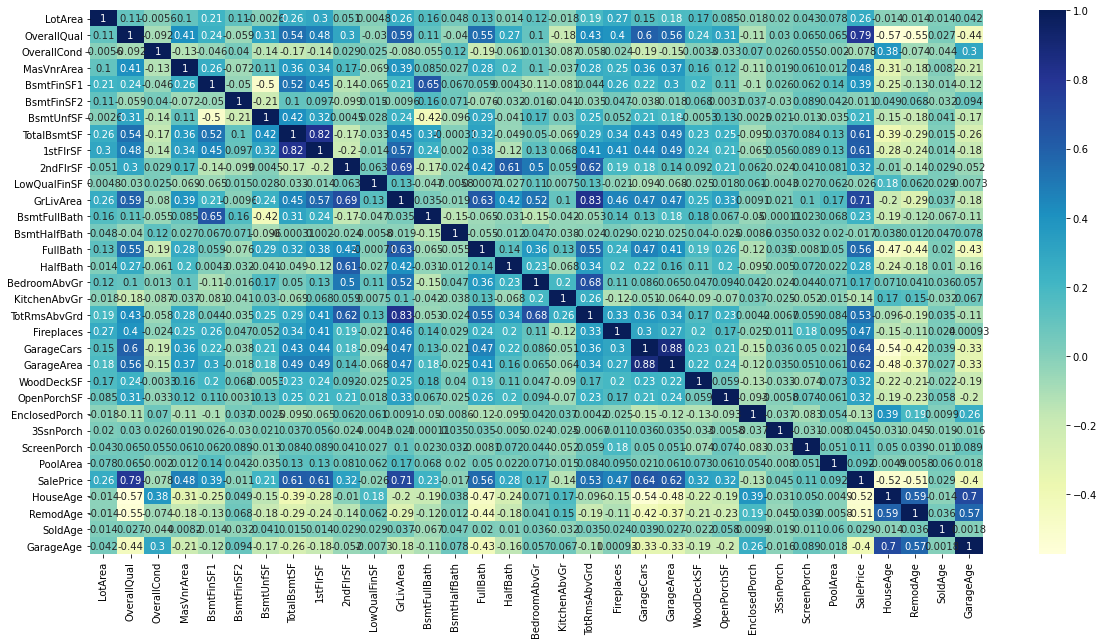

In [699]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(20,10))
# heatmap
sns.heatmap(df_num.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Observations:
- Sales price is highly correlated to: <br>
    - OverallQual, GrLivArea >70% <br>
    - TotalBsmtSF, 1stFlrSF,GarageCars, GarageArea >60%<br>
    - FullBath, TotRmsAbvGrd >50%
- High correlation between independant variables

In [651]:
#checkpoint4
#df4 = df.copy()
#df=df4.copy()
df.shape

(1300, 70)

## Model Building

### Data Preparation for Model

#### Dummy Variables

In [700]:
#Creating dummy variables for category variables
df_cat = df.select_dtypes(include=['object'])
df_dummy = pd.get_dummies(df_cat,drop_first=True)
df_dummy.shape

(1300, 205)

In [701]:
# Merging dummy variable dataset with numeric dataset to get final df
df_num = df.select_dtypes(include=['float64', 'int64'])

df_final = pd.concat([df_dummy,df_num],axis=1)
df_final.shape

(1300, 235)

In [702]:
df_final.describe()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_unkown,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,HouseAge,RemodAge,SoldAge,GarageAge
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,13

#### Splitting the Data into Training and Testing Sets

In [703]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)   # np.random.seed(0) makes the random numbers predictable. 
                    # With the seed reset (every time), the same set of numbers will appear every time.
                    # If the random seed is not reset, different numbers appear with every invocation.
        
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(909, 235)
(390, 235)


#### Scaling

In [704]:
#Getting numerical columns except response variable
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num=df_num.drop('SalePrice',axis=1)
num_vars=df_num.columns

In [705]:
scaler = MinMaxScaler()  # 1. Instantiate normalizer object
df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # 2. Fit on data
df_train.describe()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_unkown,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,HouseAge,RemodAge,SoldAge,GarageAge
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909

#### Dividing into X and y sets for the model building

In [706]:
#Splitting into X & y
y_train = df_train.pop('SalePrice')
X_train = df_train

#Checking shape
print(y_train.shape) 
print(X_train.shape)

(909,)
(909, 234)


### Linear Regression

In [707]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [708]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass_30', False, 157),
 ('MSSubClass_40', False, 115),
 ('MSSubClass_45', False, 55),
 ('MSSubClass_50', False, 155),
 ('MSSubClass_60', False, 196),
 ('MSSubClass_70', False, 197),
 ('MSSubClass_75', False, 28),
 ('MSSubClass_80', False, 161),
 ('MSSubClass_85', False, 162),
 ('MSSubClass_90', False, 27),
 ('MSSubClass_120', False, 49),
 ('MSSubClass_160', False, 48),
 ('MSSubClass_180', False, 141),
 ('MSSubClass_190', False, 41),
 ('MSZoning_FV', False, 44),
 ('MSZoning_RH', False, 31),
 ('MSZoning_RL', False, 40),
 ('MSZoning_RM', False, 43),
 ('Street_Pave', False, 174),
 ('LotShape_IR2', False, 179),
 ('LotShape_IR3', False, 168),
 ('LotShape_Reg', False, 189),
 ('LandContour_HLS', False, 124),
 ('LandContour_Low', False, 87),
 ('LandContour_Lvl', False, 202),
 ('Utilities_NoSeWa', False, 60),
 ('LotConfig_CulDSac', False, 181),
 ('LotConfig_FR2', False, 148),
 ('LotConfig_FR3', False, 127),
 ('LotConfig_Inside', False, 211),
 ('LandSlope_Mod', False, 167),
 ('LandSlope_

In [709]:
# Accepting selected variable via RFE
col = X_train.columns[rfe.support_]
col

Index(['Neighborhood_StoneBr', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Functional_Sev', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageArea', 'HouseAge'],
      dtype='object')

In [710]:
X_train.columns[~rfe.support_]

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'RemodAge', 'SoldAge', 'GarageAge'],
      dtype='object', length=219)

#### Building model using statsmodel, for the detailed statistics

In [711]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [712]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [713]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model

In [714]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     462.4
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:21:34   Log-Likelihood:                -10539.
No. Observations:                 909   AIC:                         2.111e+04
Df Residuals:                     894   BIC:                         2.118e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.111e+04 

#### Residual Analysis of the train data

In [715]:
y_train_pred = lm1.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

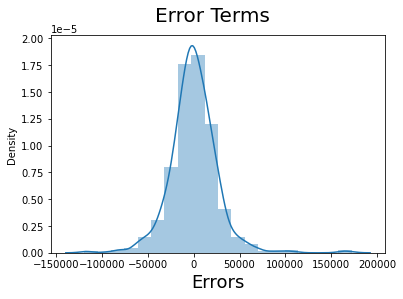

In [716]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Observation: Slightly skewed

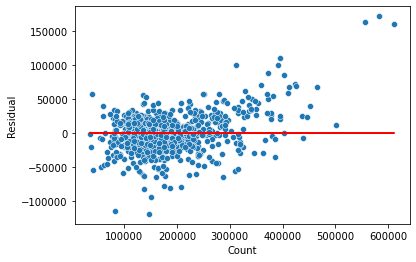

In [717]:
# Checking for Homoscedasticity
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### Observation: Variance is not uniform

#### Making Predictions

In [718]:
# Apply scaling on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [719]:
#Dividing into X_test and y_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [720]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)

In [721]:
y_pred = lm1.predict(X_test_new1)

In [722]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print('R2(train)',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred)
print('R2(test)',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('RSS(train)',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred))
print('RSS(test)',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('MSE(train)',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred)
print('MSE(test)',mse_test_lr)
metric.append(mse_test_lr**0.5)

R2(train) 0.8786677218626813
R2(test) 0.8754895932295991
RSS(train) 625793426360.8462
RSS(test) 269666660785.75882
MSE(train) 688441613.1582466
MSE(test) 691452976.3737406


Text(0, 0.5, 'y_pred')

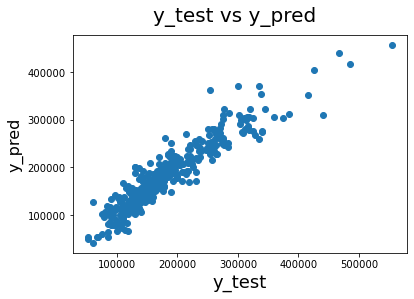

In [723]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### Ridge Regression

In [724]:
# list of alphas to tune
params = {'alpha': [ 0.001, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0,5.0, 6.0,7.0, 8.0, 9.0,10.0,50,100]}

ridge = Ridge()

# cross validation
folds = 10
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_rfe, y_train)

Fitting 10 folds for each of 23 candidates, totalling 230 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [725]:
# Printing alpha value
print(ridge_cv.best_params_)

{'alpha': 3.0}


In [726]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 42764.06894206 -40830.31876654 -46824.58129448 -59132.89105103
 -21874.93110878  95988.23160883  48562.39875233  55929.26276578
  66073.088129    42590.94549851  78139.20129125 -26708.66110724
  61242.97739034  55034.17446613 -34043.69393322]


In [727]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8751103650282875
0.87499962827627
644141145173.675
270727834837.7397
708626122.3032728
694173935.4813838


In [728]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
ridge_df.head(20)

,Features,Coefficient
5,OverallQual,95988.2316
10,GrLivArea,78139.2013
8,1stFlrSF,66073.0881
12,TotRmsAbvGrd,61242.9774
7,TotalBsmtSF,55929.2628
13,GarageArea,55034.1745
6,BsmtFinSF1,48562.3988
0,Neighborhood_StoneBr,42764.0689
9,2ndFlrSF,42590.9455
4,Functional_Sev,-21874.9311


In [729]:
# display the mean scores
ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,3.0,-18287.292745,-18610.049874,1
12,2.0,-18267.132816,-18611.778064,2
14,4.0,-18319.373149,-18624.518487,3
15,5.0,-18366.329705,-18647.467325,4
11,1.0,-18269.625989,-18670.695606,5
10,0.9,-18272.096219,-18679.551334,6
9,0.8,-18275.841058,-18688.886958,7
16,6.0,-18427.903594,-18694.005762,8
8,0.7,-18280.039701,-18700.057462,9
7,0.6,-18284.540399,-18711.772863,10


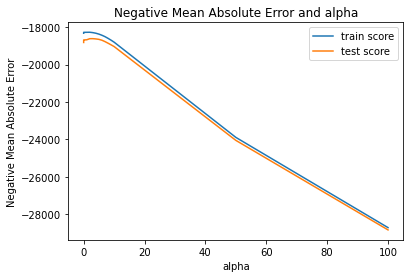

In [730]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Lasso Regression

In [731]:
lasso = Lasso()
# List alpha to tune
params = {'alpha': [ 0.001, 0.01,0.0001,0.002,0.0002,0.003, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
folds=10
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.0001, 0.002, 0.0002, 0.003,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [732]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.8}


In [733]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.8

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.8)

In [734]:
lasso.coef_

array([ 4.98066382e+03,  7.97918235e+03, -5.24106122e+03, -6.39854690e+03,
        2.76637644e+03,  1.26326780e+03, -1.27933923e+04, -9.15169803e+03,
       -7.63910418e+03, -1.74082134e+04, -9.29681661e+03, -4.41240444e+03,
        6.09197373e+03, -1.40238973e+04,  4.86153260e+04,  3.98413674e+04,
        3.45533010e+04,  3.61279266e+04, -2.36024148e+03, -2.33941574e+03,
        5.39594967e+03,  2.03414307e+03,  4.60598833e+03, -1.49425806e+04,
       -1.01008824e+03, -2.40536124e+04,  4.47511073e+03, -5.99872368e+03,
       -9.17681531e+03,  7.21583657e+02,  3.68002333e+03, -2.52678638e+04,
        2.95299088e+03, -3.10907868e+03, -1.17985053e+04, -1.44348799e+04,
       -1.04268504e+04,  1.19808962e+04, -2.15969629e+04, -1.16919462e+04,
       -2.26707156e+04, -1.36478302e+04, -1.90631644e+04, -1.91599770e+04,
        1.96288583e+04, -2.16080750e+04,  1.66376400e+04,  1.30413978e+04,
       -1.81212724e+04, -1.33021276e+04, -1.13121908e+04, -6.09545617e+03,
       -1.33088724e+04,  

In [735]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2(train)',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2(test)',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(train)',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('R2(test)',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(train)',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(test)',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2(train) 0.9461942512116629
R2(test) 0.9037633989102177
RSS(train) 277512994967.8908
R2(test) 208430793332.06436
MSE(train) 305294823.9470746
MSE(test) 534437931.6206778


In [736]:
# display the mean scores
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,3,-18287.292745,-18610.049874,1
12,2,-18267.132816,-18611.778064,2
14,4,-18319.373149,-18624.518487,3
15,5,-18366.329705,-18647.467325,4
11,1,-18269.625989,-18670.695606,5
10,0,-18272.096219,-18679.551334,6
9,0,-18275.841058,-18688.886958,7
16,6,-18427.903594,-18694.005762,8
8,0,-18280.039701,-18700.057462,9
7,0,-18284.540399,-18711.772863,10


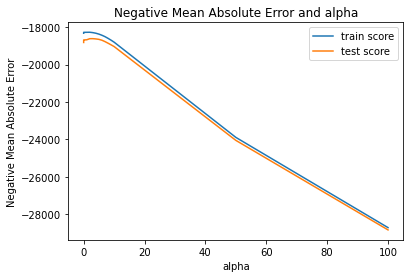

In [737]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [738]:
# Put the Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
lasso_df.head(10)

,Features,Coefficient
213,1stFlrSF,112772.1255
214,2ndFlrSF,69302.1063
192,SaleType_CWD,51120.5466
53,Neighborhood_StoneBr,48799.9706
205,LotArea,48625.1208
14,MSZoning_FV,48615.3260
206,OverallQual,45469.8963
207,OverallCond,41936.1664
225,GarageArea,40718.9521
15,MSZoning_RH,39841.3674


# Comparison

In [739]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.786677e-01,8.751104e-01,9.461943e-01
1,R2 Score (Test),8.754896e-01,8.749996e-01,9.037634e-01
2,RSS (Train),6.257934e+11,6.441411e+11,2.775130e+11
3,RSS (Test),2.696667e+11,2.707278e+11,2.084308e+11
4,MSE (Train),2.623817e+04,2.662003e+04,1.747269e+04
5,MSE (Test),2.629549e+04,2.634718e+04,2.311791e+04


# Conclusion

- Lasso gives the best results as above
- Alpha for Ridge is 3
- Alpha for Lasso is 0.8

---

---

# Subjective Questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [571]:
# Display ridge alpha value
print(ridge_cv.best_params_)

{'alpha': 3.0}


In [572]:
#Fitting Ridge model for alpha = 0.4 and printing coefficients which have been penalised
alpha = 6    # Double of original alpha value
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 39462.7773556  -30266.81438298 -39987.65550928 -55190.48575811
 -12072.72980529  87599.21551277  47768.74422799  56597.6216569
  62246.07514315  40424.21411239  73786.05822202 -16428.10275425
  58852.54057774  55042.13353904 -34836.98481706]


In [573]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
#X_test_new = X_test[col]

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2(train)',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2(test)',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(train)',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS(test)',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(train)',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(test)',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2(train) 0.8700668408826202
R2(test) 0.8716172467523737
RSS(train) 670154043839.2611
RSS(test) 278053451665.37146
MSE(train) 737243172.5404413
MSE(test) 712957568.3727473


In [574]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
ridge_df.head(10)

,Features,Coefficient
5,OverallQual,87599.2155
10,GrLivArea,73786.0582
8,1stFlrSF,62246.0751
12,TotRmsAbvGrd,58852.5406
7,TotalBsmtSF,56597.6217
13,GarageArea,55042.1335
6,BsmtFinSF1,47768.7442
9,2ndFlrSF,40424.2141
0,Neighborhood_StoneBr,39462.7774
4,Functional_Sev,-12072.7298


In [575]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.8}


In [576]:
#Fitting Ridge model for alpha = 0.0004 and printing coefficients which have been penalised

alpha =1.6 # Double of original alpha value

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=1.6)

In [577]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
lasso_df.head(10)

,Features,Coefficient
213,1stFlrSF,104152.4200
214,2ndFlrSF,62750.8906
192,SaleType_CWD,50065.9308
53,Neighborhood_StoneBr,50027.3844
205,LotArea,48117.5110
14,MSZoning_FV,47024.4105
206,OverallQual,45518.6556
215,GrLivArea,44958.1528
207,OverallCond,41823.6728
225,GarageArea,40132.0282


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [578]:
X_train_drop=X_train.drop(['1stFlrSF','2ndFlrSF','SaleType_CWD','Neighborhood_StoneBr','LotArea'],axis='columns')


In [579]:
lasso = Lasso()
params = {'alpha': [ 0.001, 0.01,0.0001,0.002,0.0002,0.003, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
folds=10
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_drop, y_train) 

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.0001, 0.002, 0.0002, 0.003,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [580]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.8}


In [582]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.8

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_drop, y_train)

Lasso(alpha=0.8)

In [583]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_drop.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
lasso_df.head(10)

,Features,Coefficient
210,GrLivArea,176783.9856
14,MSZoning_FV,48142.8942
203,OverallQual,46875.2129
220,GarageArea,43897.6748
206,BsmtFinSF1,43843.3468
209,TotalBsmtSF,42990.7986
204,OverallCond,40012.3273
17,MSZoning_RM,36157.3466
15,MSZoning_RH,36063.2869
16,MSZoning_RL,33998.6413
